In [ ]:
import pandas as pd
import numpy as np
import importlib
import os

import helper_functions as hf
importlib.reload(hf)
import simulation_functions as sf
importlib.reload(sf)

from helper_functions import create_risk_return_plot, get_excel_sheet_names
from helper_functions import data_for_plotting

from simulation_functions import calculate_instrument_correlations, simulate_portfolio, plot_simulated_portfolio

In [28]:
file_path = 'fund.xlsx'
sheet_names = get_excel_sheet_names(file_path)
print(sheet_names)
data = pd.read_excel(file_path, sheet_name='fund_assets')
data.set_index('Strategy', inplace=True, drop=False)
data.drop('Summary', axis=0, inplace=True)
factor_corr = pd.read_excel(file_path, sheet_name='Factor_Correlation')
factor_corr.set_index('Unnamed: 0', inplace=True)

['fund_assets', 'Links', 'long_only_pms', 'Factor_Correlation']


Creating original Amunra Advisors plot...


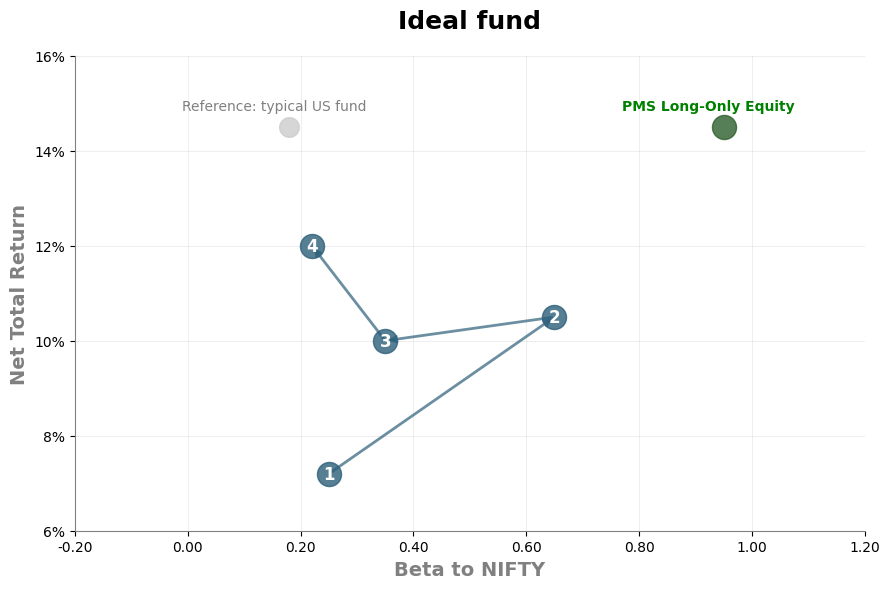

Creating plot own research...


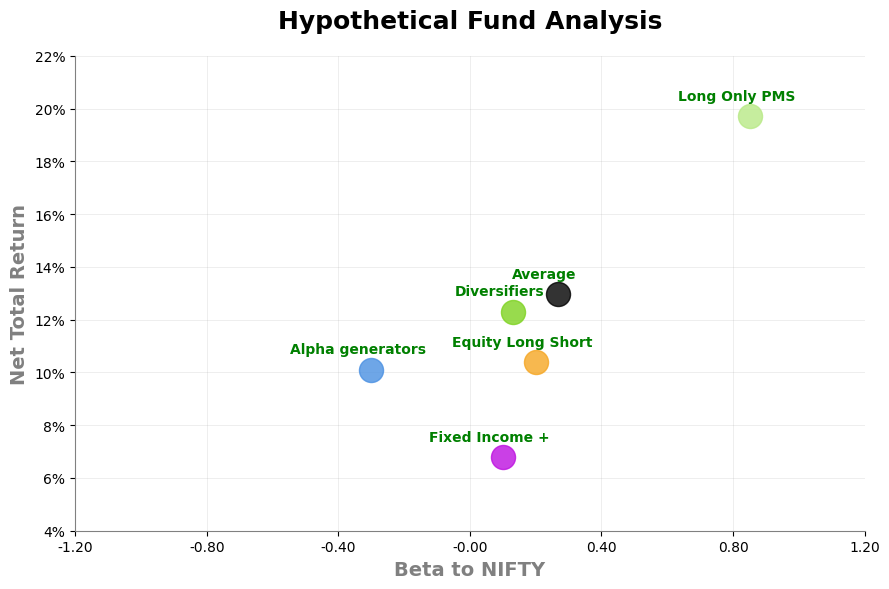

In [29]:
# Example 1: Original plot
print("Creating original Amunra Advisors plot...")
fig1, ax1 = create_risk_return_plot(title="Ideal fund")

# Example 2: Custom data with different styling
print("Creating plot own research...")
df = data.reset_index(level='Strategy', drop=True)
plot_data = data_for_plotting(df)

fig2, ax2 = create_risk_return_plot(
    data_points=plot_data,
    title="Hypothetical Fund Analysis",
    show_arrows=False,
)

In [30]:
factor_names = factor_corr.columns.tolist()
factor_beta = data[factor_names].T

instrument_corr = calculate_instrument_correlations(factor_corr, factor_beta)
instrument_corr

Strategy,Fixed Income +,Fixed Income +,Equity Long Short,Equity Long Short,Long Only PMS,Long Only PMS,Long Only PMS,Diversifiers,Diversifiers,Alpha generators
Strategy,,,,,,,,,,
Fixed Income +,1.000,0.909,0.211,0.530,0.577,0.461,0.398,0.248,0.366,-0.085
Fixed Income +,0.909,1.000,0.410,0.677,0.804,0.685,0.613,-0.174,0.540,0.126
Equity Long Short,0.211,0.410,1.000,0.926,0.749,0.852,0.934,-0.434,0.038,0.939
Equity Long Short,0.530,0.677,0.926,1.000,0.899,0.946,0.974,-0.328,0.288,0.741
Long Only PMS,0.577,0.804,0.749,0.899,1.000,0.977,0.929,-0.536,0.623,0.507
Long Only PMS,0.461,0.685,0.852,0.946,0.977,1.000,0.982,-0.534,0.516,0.645
Long Only PMS,0.398,0.613,0.934,0.974,0.929,0.982,1.000,-0.498,0.352,0.770
Diversifiers,0.248,-0.174,-0.434,-0.328,-0.536,-0.534,-0.498,1.000,-0.488,-0.448
Diversifiers,0.366,0.540,0.038,0.288,0.623,0.516,0.352,-0.488,1.000,-0.218


In [ ]:
mu = data["Return_post"]
sigma = data["Std Dev"]
corr_matrix = instrument_corr
weights = data["Net_exp"]
returns = simulate_portfolio(mu, sigma, corr_matrix, weights, n_scenarios=1000)

In [34]:
returns

,Simulated_Return,Simulated_StdDev
0,0.125533,0.046228
1,0.160055,0.085099
2,0.037595,0.087239
3,0.183748,0.073851
4,0.181708,0.080224
...,...,...
995,0.323843,0.075433
996,-0.072805,0.078387
997,0.222510,0.107615
998,0.121664,0.088430
